**Projet 5 : Segmentez des clients d'un site e-commerce**

**Contexte**

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

#Import

##Librairies

In [ ]:
# import des librairies
import pandas as pd
import numpy as np

# Pour afficher les graphiques dans la continuité du code,
# et non pas dans une fenêtre à part:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

#Anova
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats as sms

#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection

#Processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-358864a12876>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


##Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df_customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/olist_customers_dataset.csv') # encoding='utf-8', engine='python', sep ='\\t')
df_geolocation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/olist_geolocation_dataset.csv')
df_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/olist_order_items_dataset.csv')
df_payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/olist_products_dataset.csv')
df_sellers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/olist_sellers_dataset.csv')
df_category_name = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/archive/product_category_name_translation.csv')

#Analyse exploratoire des données non cleané

##Visualisation et description des dataset

In [ ]:
#Customers
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
df_customers.shape

(99441, 5)

In [ ]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
df_customers['customer_unique_id'].unique().shape

(96096,)

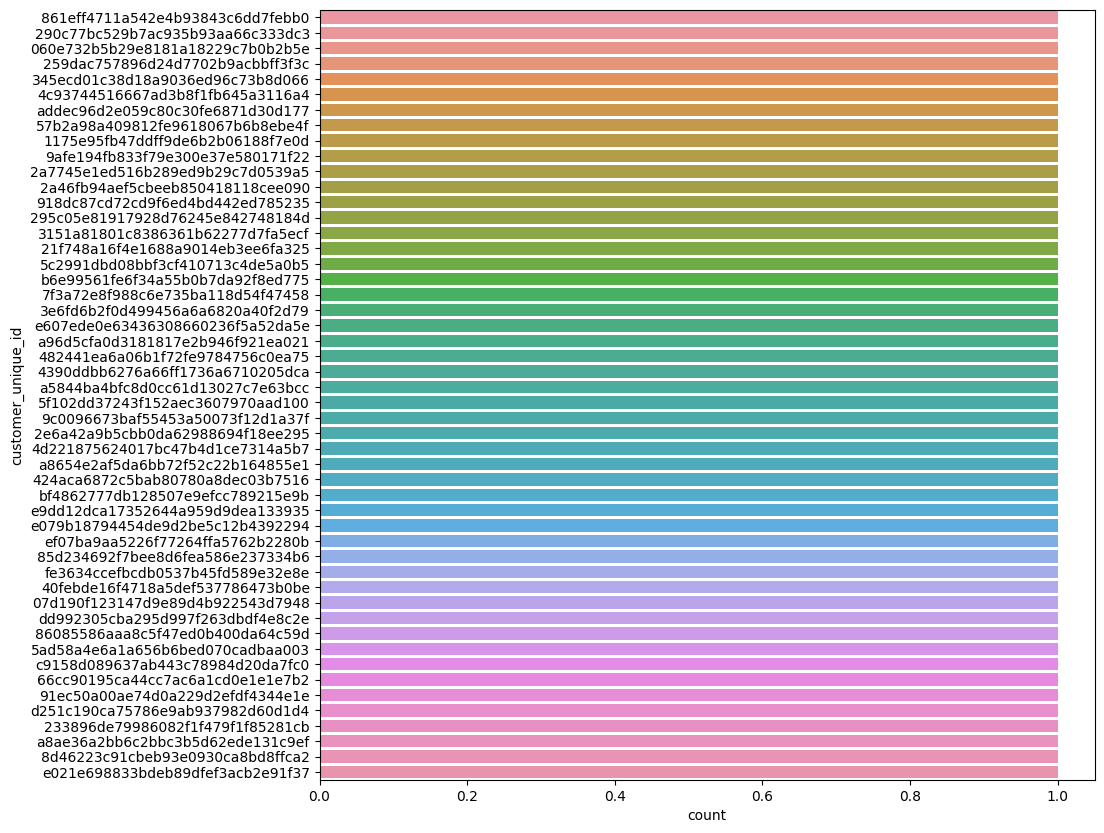

In [ ]:
plt.figure(figsize=(10,10))
fig = sns.countplot(data = df_customers.head(50), y= 'customer_unique_id')
plt.show()

On a donc 96096 clients dans notre data set

In [ ]:
df_customers['customer_id'].unique().shape

(99441,)

On a 99441 commandes

In [ ]:
#plt.pie(df_customers['customer_unique_id'].value_counts().head,
#		labels=df_customers['customer_unique_id'].value_counts().index,
#		autopct='%.0f%%')
#plt.show()

In [ ]:
df_customers['customer_city'].unique().shape

(4119,)

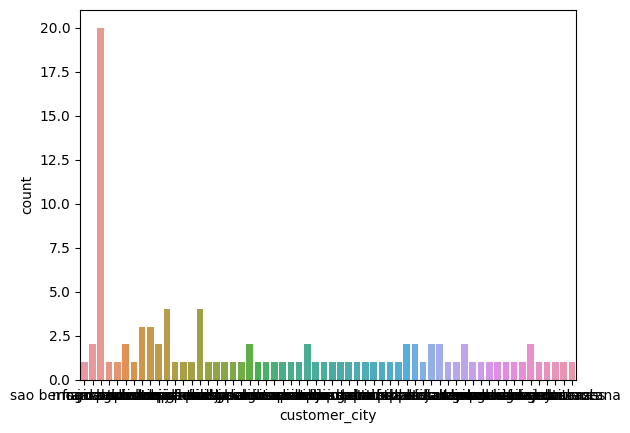

In [ ]:
fig = sns.countplot(data = df_customers.head(100), x= 'customer_city')
plt.show()

Les clietns sont répartie dans 4119 villes différentes

In [ ]:
df_customers['customer_city'].value_counts()

sao paulo            15540
rio de janeiro       6882 
belo horizonte       2773 
brasilia             2131 
curitiba             1521 
                     ...  
bequimao             1    
andarai              1    
vargem grande        1    
curvelandia          1    
eugenio de castro    1    
Name: customer_city, Length: 4119, dtype: int64

In [ ]:
df_customers.groupby('customer_city')['customer_id','customer_unique_id'].nunique()

<ipython-input-15-ff7fcce25579>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_customers.groupby('customer_city')['customer_id','customer_unique_id'].nunique()


,customer_id,customer_unique_id
customer_city,,
abadia dos dourados,3,3
abadiania,1,1
abaete,12,12
abaetetuba,11,11
abaiara,2,2
...,...,...
xinguara,9,9
xique-xique,3,3
zacarias,2,2


In [ ]:
#cus = df_customers.groupby('customer_city')['customer_id','customer_unique_id'].nunique().head(200)
#sns.pairplot(data = cus, x = 'customer_city', y = 'customer_id')

In [ ]:
df_customers['customer_state'].unique().shape

(27,)

ON a 27 état en tout dans la dataset

In [ ]:
#Geolocation
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
df_geolocation.shape

(1000163, 5)

In [ ]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
df_geolocation['geolocation_state'].value_counts()

SP    404268
MG    126336
RJ    121169
RS    61851 
PR    57859 
SC    38328 
BA    36045 
GO    20139 
ES    16748 
PE    16432 
DF    12986 
MT    12031 
CE    11674 
PA    10853 
MS    10431 
MA    7853  
PB    5538  
RN    5041  
PI    4549  
AL    4183  
TO    3576  
SE    3563  
RO    3478  
AM    2432  
AC    1301  
AP    853   
RR    646   
Name: geolocation_state, dtype: int64

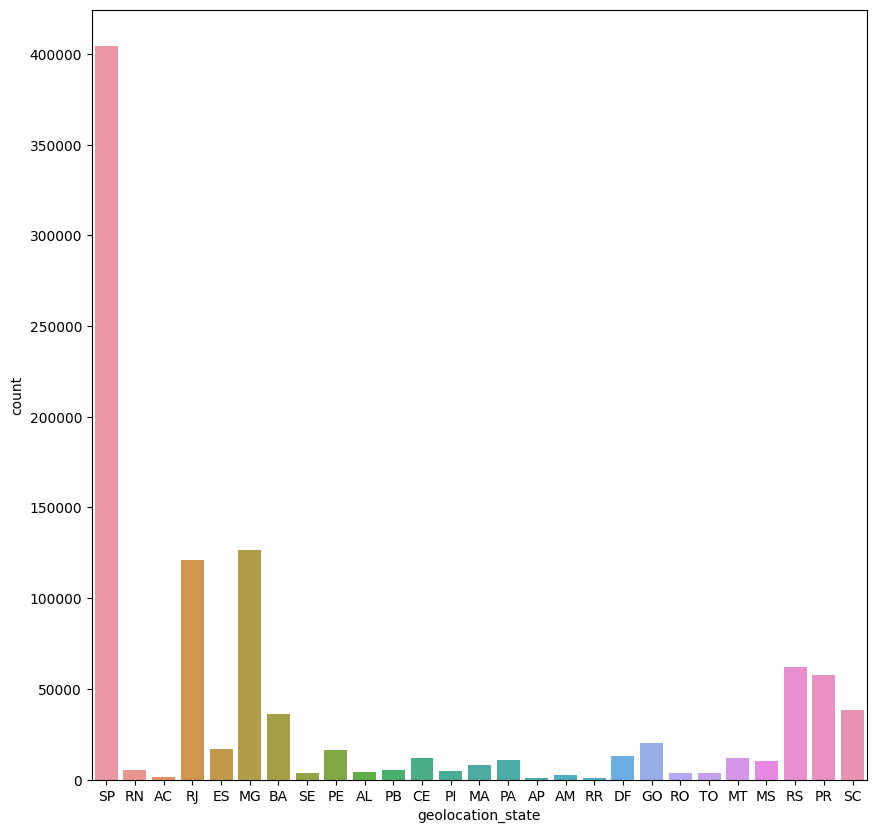

In [ ]:
plt.figure(figsize=(10,10))
fig = sns.countplot(data = df_geolocation, x= 'geolocation_state')
plt.show()

In [ ]:
#Items
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_items.shape

(112650, 7)

In [ ]:
df_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


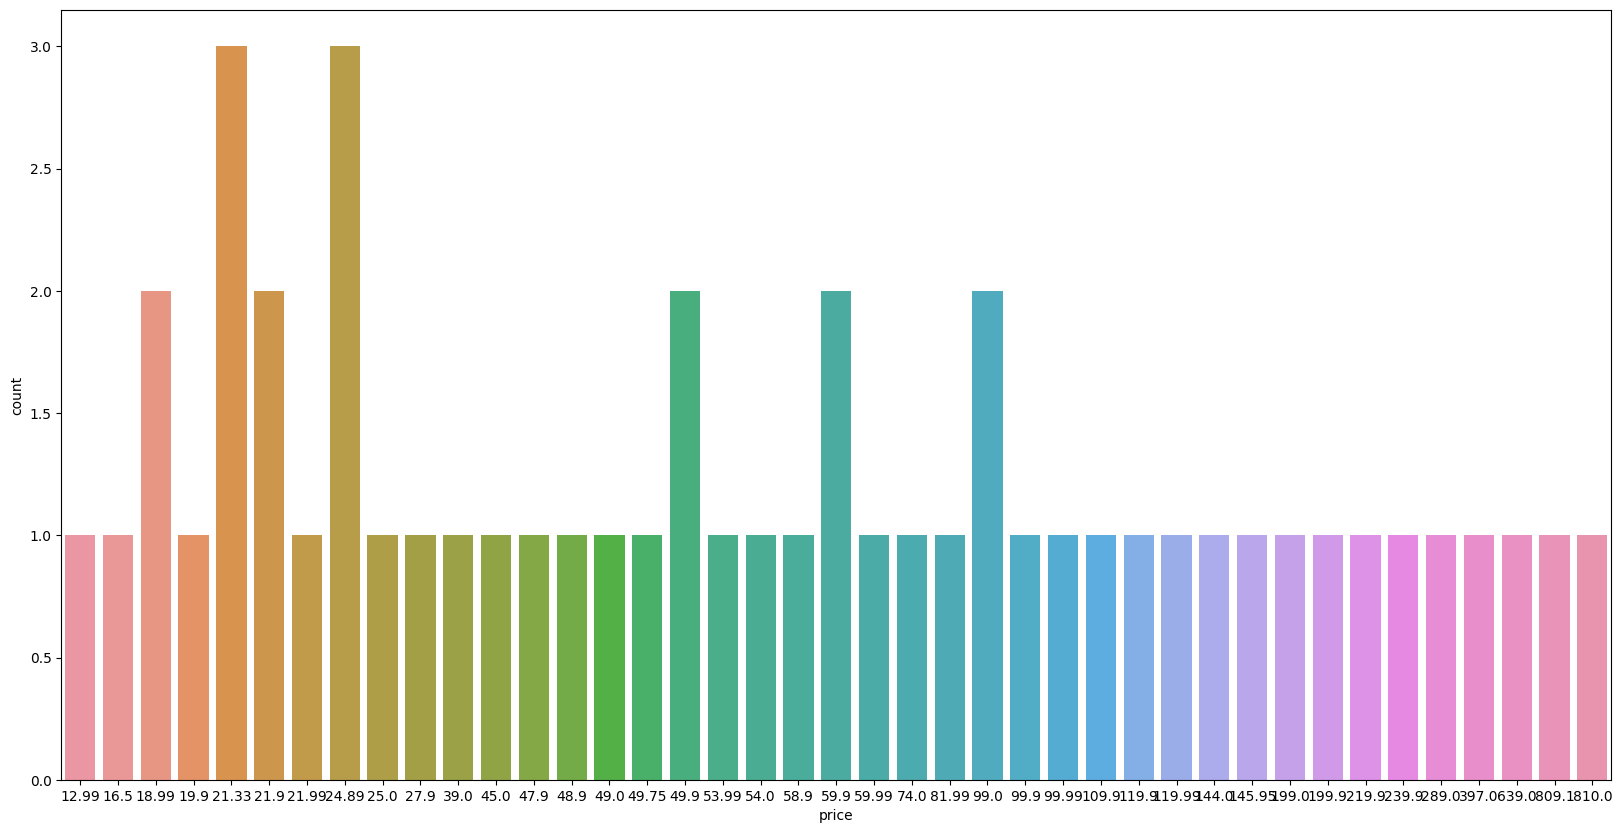

In [ ]:
plt.figure(figsize=(20,10))
fig = sns.countplot(data = df_items.head(50), x= 'price')
plt.show()

In [ ]:
# On réalise un histogram avec les intervales de prix

df_test = df_items.copy()

# def categorize(data):

#   if data in [0,40]:
#     return '0-40'
#   elif '40' <= data < 75:
#     return '40-75';
#   elif 75 <= data < 135:
#     return '75-135';
#   elif 135 <= data < 200:
#     return '135-200';
#   elif 200 <= data < 500:
#     return '200-500';
#   elif 500 <= data < 6800:
#     return '500-6800'

# df_test['priceRange'] = categorize(df_test['price'])

df_test['priceRange'] = np.where(df_test['price'] > 200,"+ 200",
									(np.where(df_test['price'] > 135,
										"135-200",
										(np.where(df_test['price'] > 75,
							"75-135",
							np.where(df_test['price'] > 40,
							'40-75',
                np.where(df_test['price'] > 0,
                         '0-40','<40')))))))
df_test['priceRange'].head(20)

0     40-75  
1     + 200  
2     135-200
3     0-40   
4     135-200
5     0-40   
6     0-40   
7     + 200  
8     135-200
9     40-75  
10    40-75  
11    40-75  
12    40-75  
13    40-75  
14    40-75  
15    75-135 
16    + 200  
17    135-200
18    75-135 
19    0-40   
Name: priceRange, dtype: object

In [ ]:
df_test

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,priceRange
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,40-75
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,+ 200
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,135-200
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,0-40
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,135-200
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,+ 200
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,+ 200
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,75-135
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,40-75


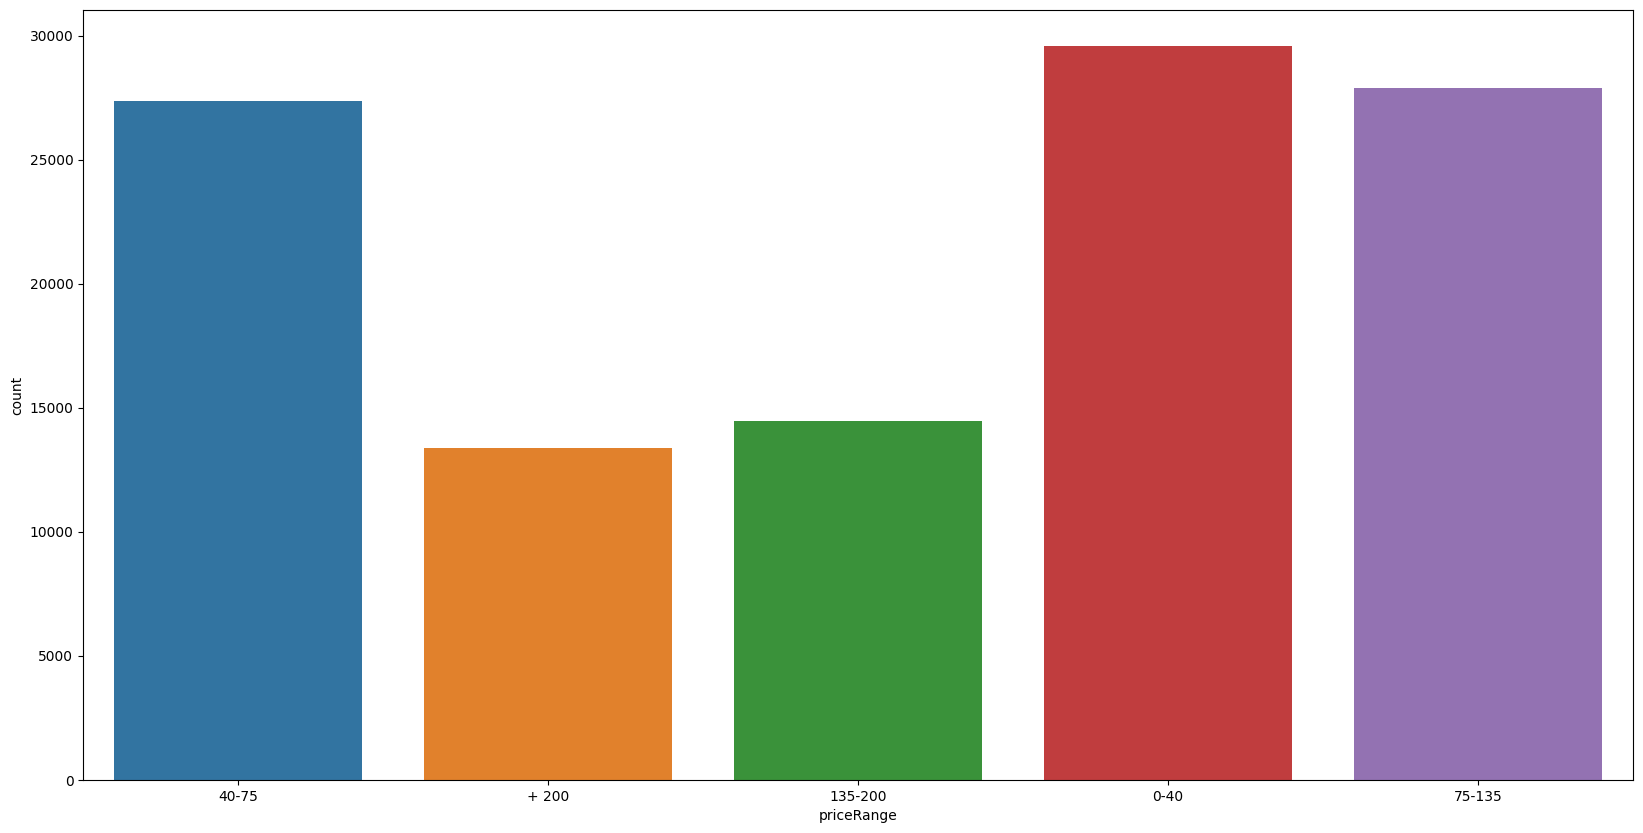

In [ ]:
plt.figure(figsize=(20,10))
fig = sns.countplot(data = df_test, x= 'priceRange')
plt.show()

In [ ]:
df_items.groupby('product_id')['order_id','seller_id'].nunique()

<ipython-input-30-843940ce25c5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_items.groupby('product_id')['order_id','seller_id'].nunique()


,order_id,seller_id
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,1,1
00088930e925c41fd95ebfe695fd2655,1,1
0009406fd7479715e4bef61dd91f2462,1,1
000b8f95fcb9e0096488278317764d19,2,1
000d9be29b5207b54e86aa1b1ac54872,1,1
...,...,...
fff6177642830a9a94a0f2cba5e476d1,2,1
fff81cc3158d2725c0655ab9ba0f712c,1,1
fff9553ac224cec9d15d49f5a263411f,1,1


In [ ]:
#Payment
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
df_payments.shape

(103886, 5)

In [ ]:
df_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


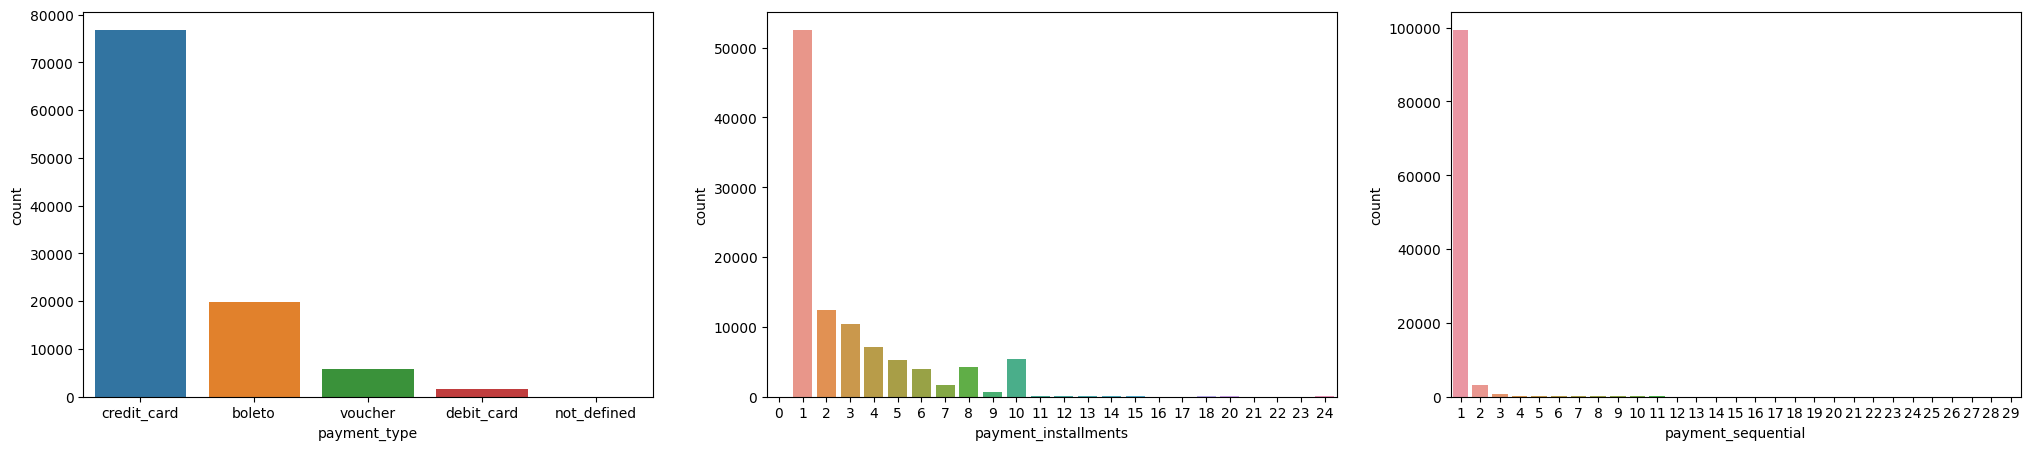

In [ ]:
plt.figure(figsize=(25, 5))
plt.subplots_adjust(wspace= 0.2)

# Recency
plt.subplot(131)
sns.countplot(data = df_payments, x= 'payment_type')

plt.subplot(132)
sns.countplot(data = df_payments, x= 'payment_installments')

plt.subplot(133)
sns.countplot(data = df_payments, x= 'payment_sequential')

plt.show()

In [ ]:
#Orders reviews
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_reviews.shape

(99224, 7)

In [ ]:
df_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


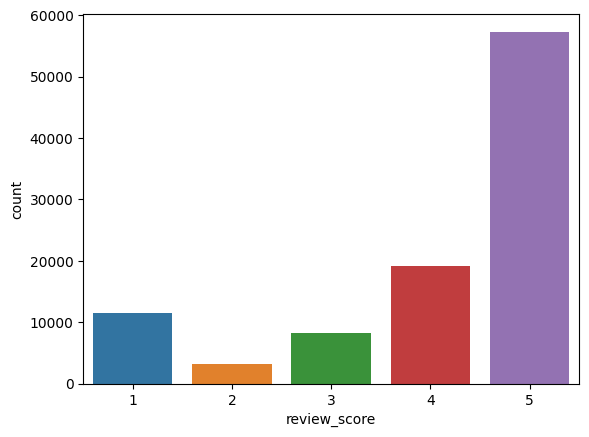

In [ ]:
sns.countplot(data = df_reviews, x= 'review_score')
plt.show()

In [ ]:
#Orders
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df_orders.shape

(99441, 8)

In [ ]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
#Products
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df_products.shape

(32951, 9)

In [ ]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
df_products['product_category_name'].value_counts()

cama_mesa_banho                                   3029
esporte_lazer                                     2867
moveis_decoracao                                  2657
beleza_saude                                      2444
utilidades_domesticas                             2335
automotivo                                        1900
informatica_acessorios                            1639
brinquedos                                        1411
relogios_presentes                                1329
telefonia                                         1134
bebes                                             919 
perfumaria                                        868 
papelaria                                         849 
fashion_bolsas_e_acessorios                       849 
cool_stuff                                        789 
ferramentas_jardim                                753 
pet_shop                                          719 
eletronicos                                       517 
construcao

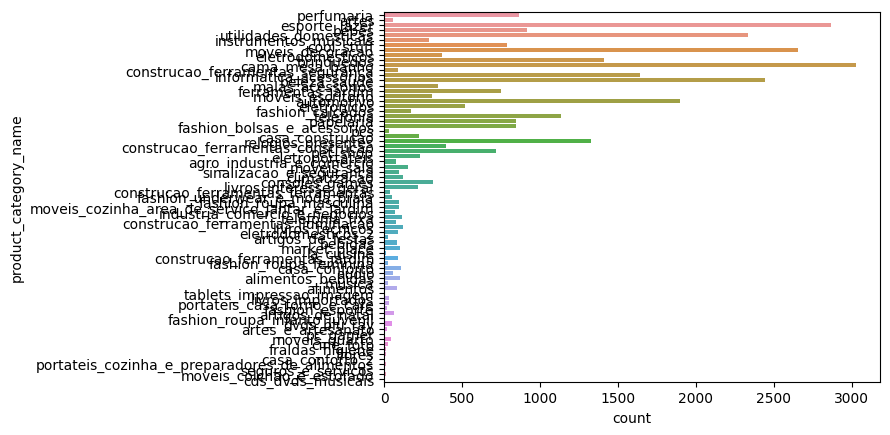

In [ ]:
sns.countplot(data = df_products, y= 'product_category_name')
plt.show()

In [ ]:
#Sellers
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df_sellers.shape

(3095, 4)

In [ ]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


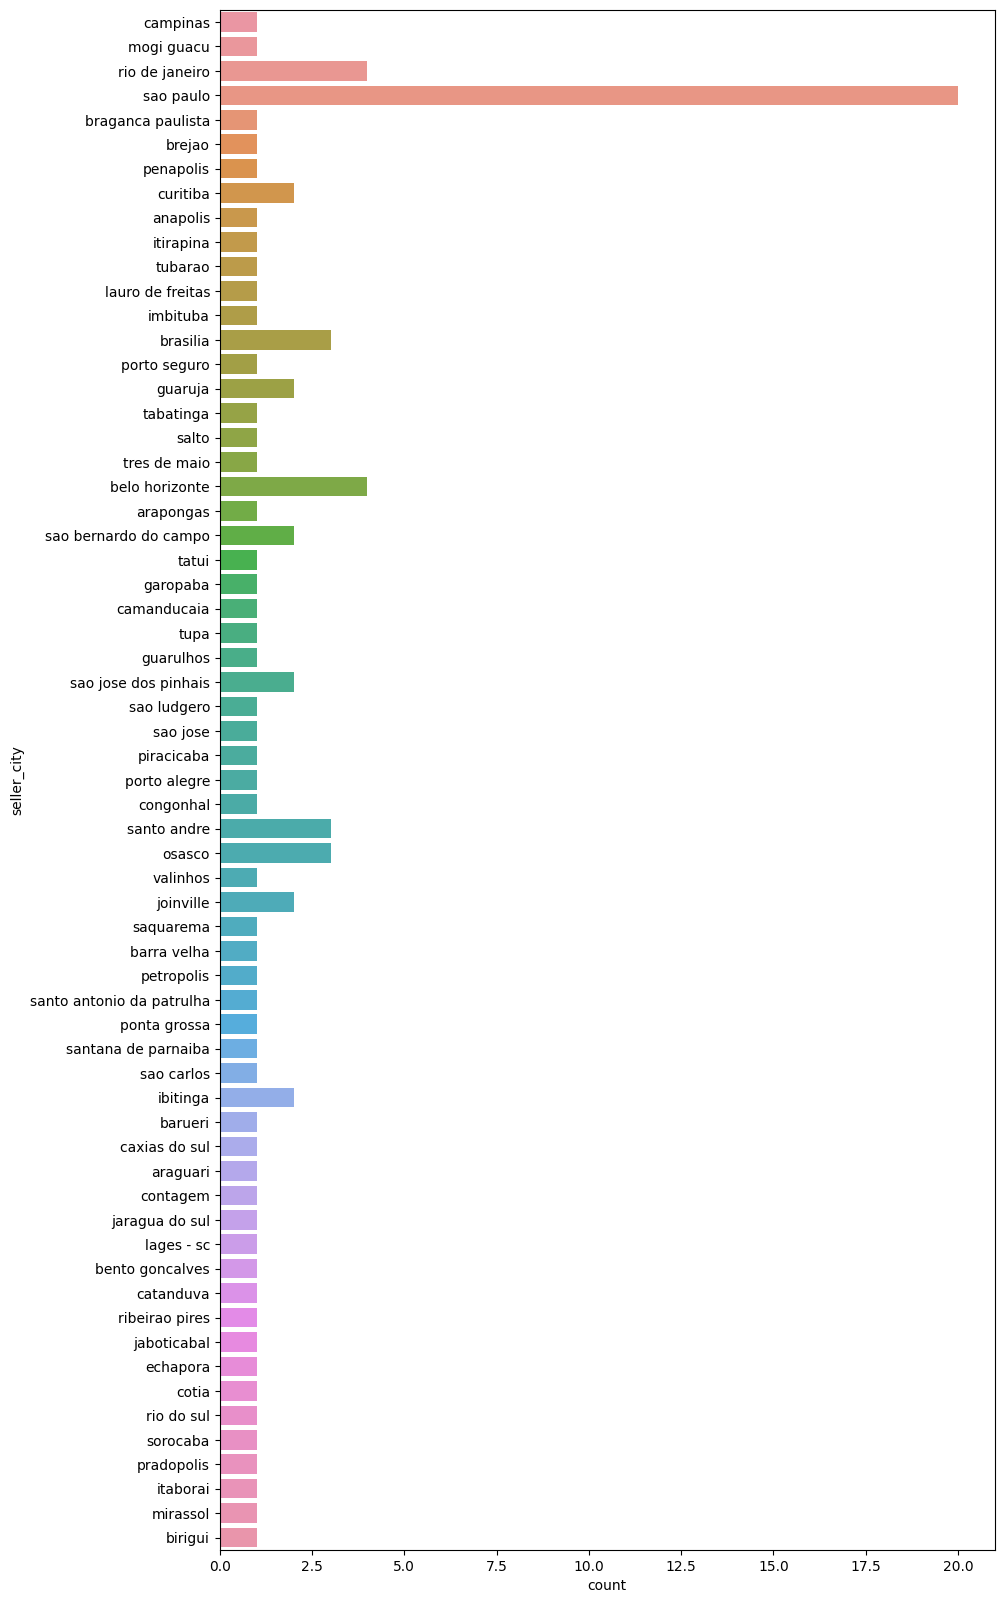

In [ ]:
plt.figure(figsize=(10,20))
sns.countplot(data = df_sellers.head(100), y= 'seller_city')
plt.show()

In [ ]:
df_sellers['seller_city'].value_counts()

sao paulo                                   694
curitiba                                    127
rio de janeiro                              96 
belo horizonte                              68 
ribeirao preto                              52 
guarulhos                                   50 
ibitinga                                    49 
santo andre                                 45 
campinas                                    41 
maringa                                     40 
sao jose do rio preto                       33 
sao bernardo do campo                       32 
sorocaba                                    32 
osasco                                      32 
porto alegre                                28 
brasilia                                    28 
londrina                                    26 
goiania                                     23 
joinville                                   22 
blumenau                                    21 
franca                                  

In [ ]:
#Product category name translation
df_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
df_category_name.shape

(71, 2)

In [ ]:
df_category_name.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


On rassemble les datasets dans un dataset sauf la geolocalisation

In [ ]:
data = df_customers.merge(df_orders, on = 'customer_id', how = 'left').merge(df_items, on = 'order_id', how = 'left').merge(df_payments, on = 'order_id', how = 'left').merge(df_reviews, on = 'order_id', how = 'left').merge(df_products, on = 'product_id', how = 'left')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [ ]:
data.shape

(119143, 36)

In [ ]:
data.dtypes

customer_id                      object 
customer_unique_id               object 
customer_zip_code_prefix         int64  
customer_city                    object 
customer_state                   object 
order_id                         object 
order_status                     object 
order_purchase_timestamp         object 
order_approved_at                object 
order_delivered_carrier_date     object 
order_delivered_customer_date    object 
order_estimated_delivery_date    object 
order_item_id                    float64
product_id                       object 
seller_id                        object 
shipping_limit_date              object 
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                     object 
payment_installments             float64
payment_value                    float64
review_id                        object 
review_score                     float64
review_comment_t

In [ ]:
data.isna().sum()

customer_id                      0     
customer_unique_id               0     
customer_zip_code_prefix         0     
customer_city                    0     
customer_state                   0     
order_id                         0     
order_status                     0     
order_purchase_timestamp         0     
order_approved_at                177   
order_delivered_carrier_date     2086  
order_delivered_customer_date    3421  
order_estimated_delivery_date    0     
order_item_id                    833   
product_id                       833   
seller_id                        833   
shipping_limit_date              833   
price                            833   
freight_value                    833   
payment_sequential               3     
payment_type                     3     
payment_installments             3     
payment_value                    3     
review_id                        997   
review_score                     997   
review_comment_title             105154


<Axes: >

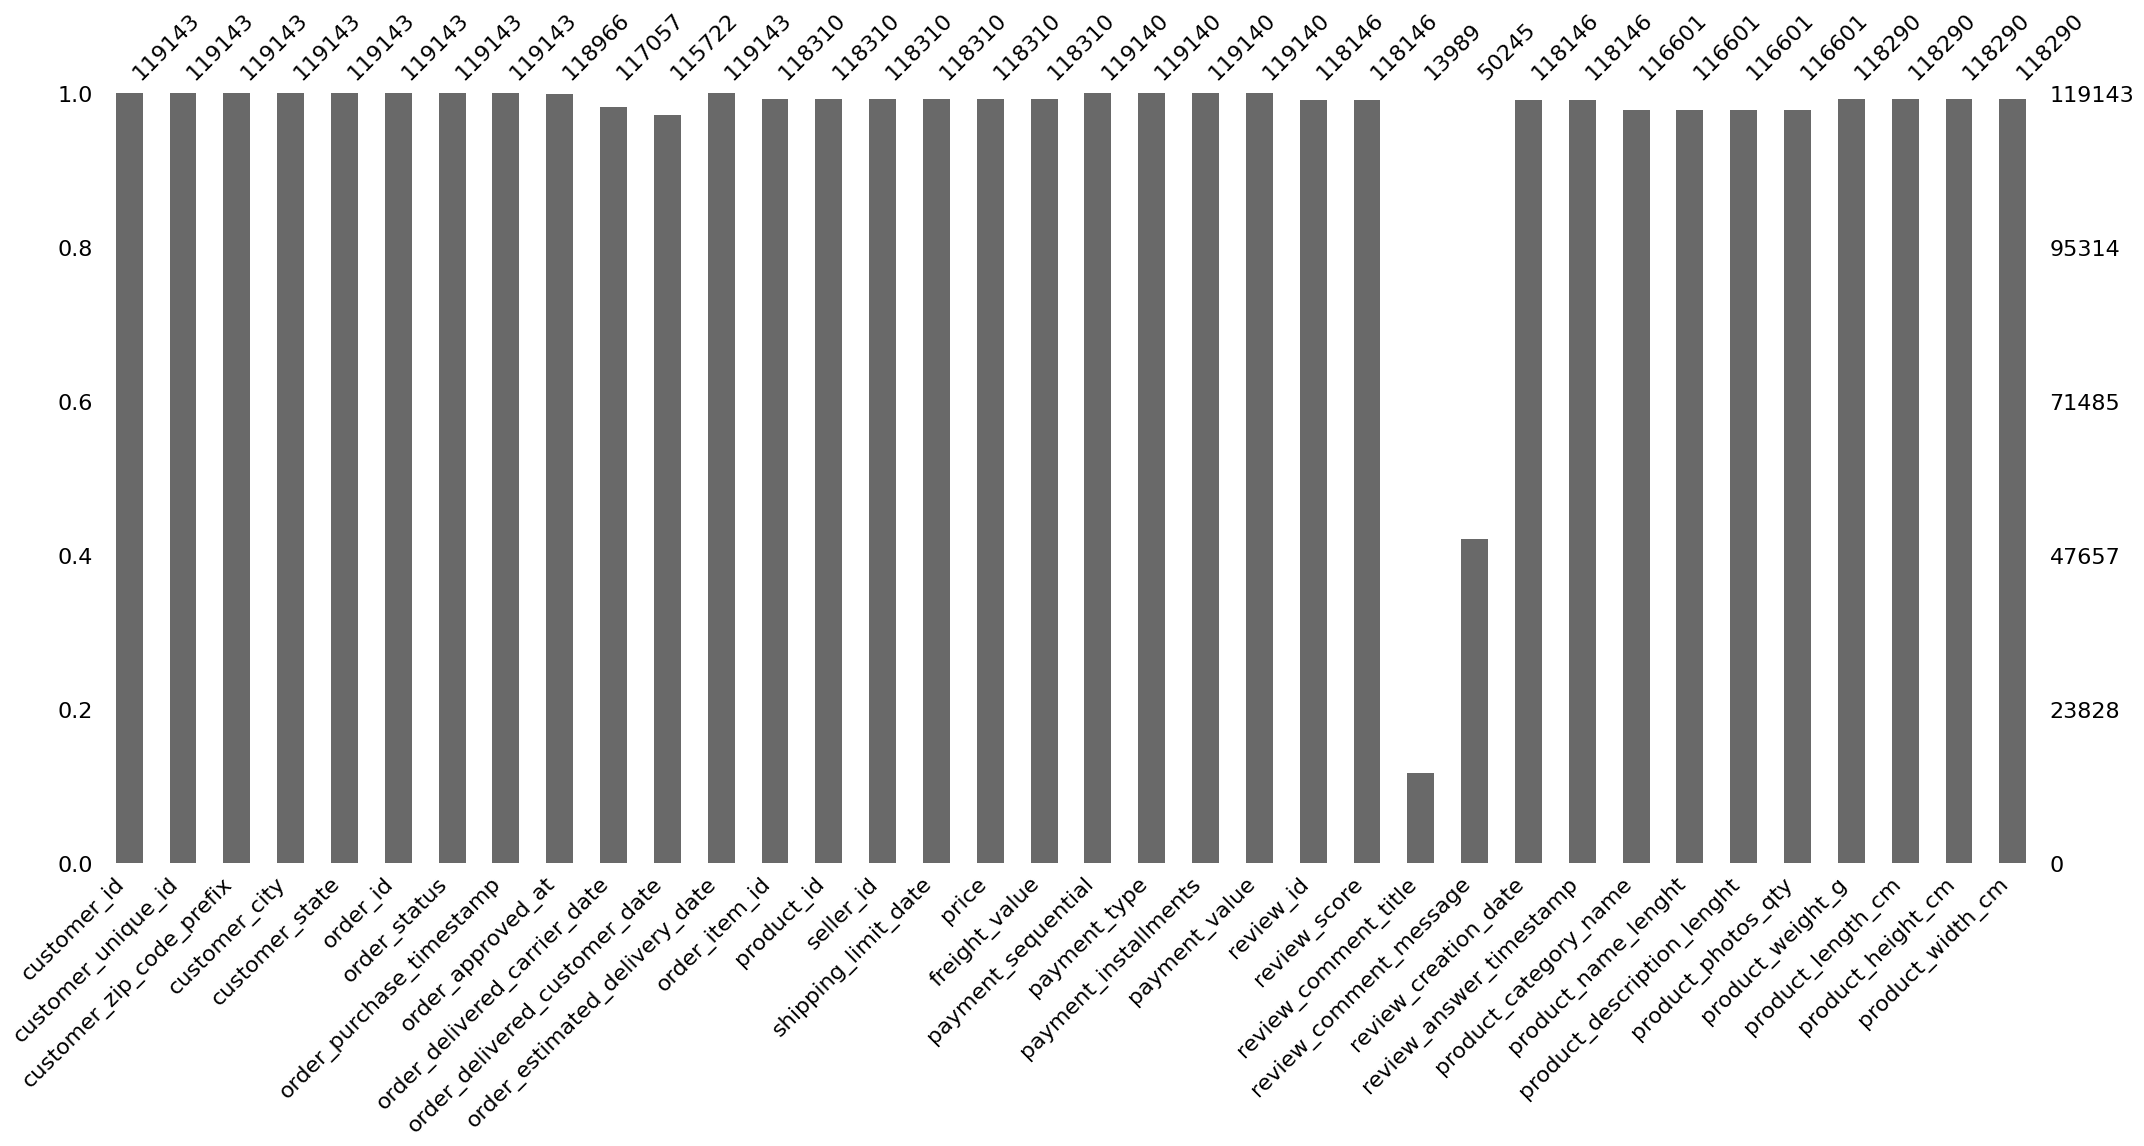

In [ ]:
msno.bar(data)

In [ ]:
#On supprime les doublons en regardant le customer_id
data = data.drop_duplicates(subset = 'customer_id', keep = "first")
data.shape

(99441, 36)

In [ ]:
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,99441.000000,98666.0,98666.000000,98666.000000,99440.000000,99440.000000,99440.000000,98673.000000,97250.000000,97250.000000,97250.000000,98650.000000,98650.000000,98650.000000,98650.000000
mean,35137.474583,1.0,125.964327,20.201927,1.022878,2.915617,158.334781,4.086853,48.846386,794.161398,2.250591,2102.617587,30.106863,16.488028,23.025778
std,29797.938996,0.0,191.375106,15.909873,0.250282,2.709861,219.518488,1.347287,9.999239,654.751953,1.747095,3765.684321,16.129250,13.325707,11.742574
min,1003.000000,1.0,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11347.000000,1.0,41.505000,13.310000,1.000000,1.000000,60.050000,4.000000,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24416.000000,1.0,79.000000,16.360000,1.000000,2.000000,103.350000,5.000000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000
75%,58900.000000,1.0,139.900000,21.230000,1.000000,4.000000,175.130000,5.000000,57.000000,996.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,1.0,6735.000000,409.680000,27.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
data.shape

(99441, 36)

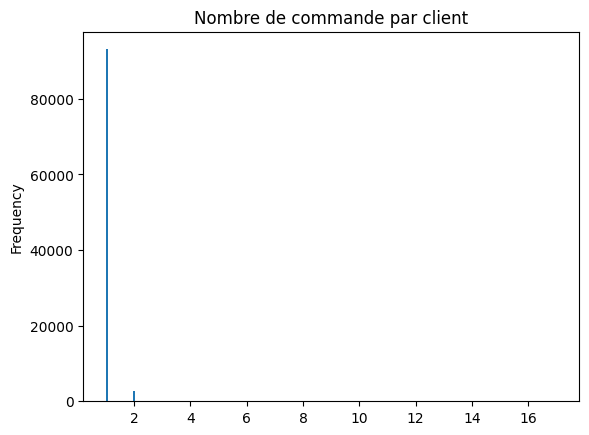

In [ ]:
#Analyse de la distribution du nombre de commandes par client

plt.title('Nombre de commande par client')
fig = data['customer_unique_id'].value_counts().plot.hist(bins= 200)
plt.show()

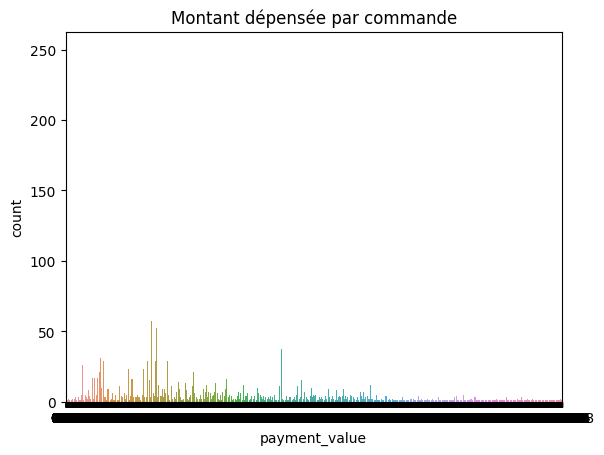

In [ ]:
#Analyse de la distribution des montants
plt.title('Montant dépensée par commande')
fig = sns.countplot (data = data, x= 'payment_value')
plt.show()

In [ ]:
data['product_category_name'].value_counts().sort_values(ascending = False)

cama_mesa_banho                                   9311
beleza_saude                                      8796
esporte_lazer                                     7681
informatica_acessorios                            6660
moveis_decoracao                                  6355
utilidades_domesticas                             5829
relogios_presentes                                5601
telefonia                                         4182
automotivo                                        3880
brinquedos                                        3861
cool_stuff                                        3603
ferramentas_jardim                                3482
perfumaria                                        3149
bebes                                             2839
eletronicos                                       2540
papelaria                                         2294
fashion_bolsas_e_acessorios                       1854
pet_shop                                          1704
moveis_esc

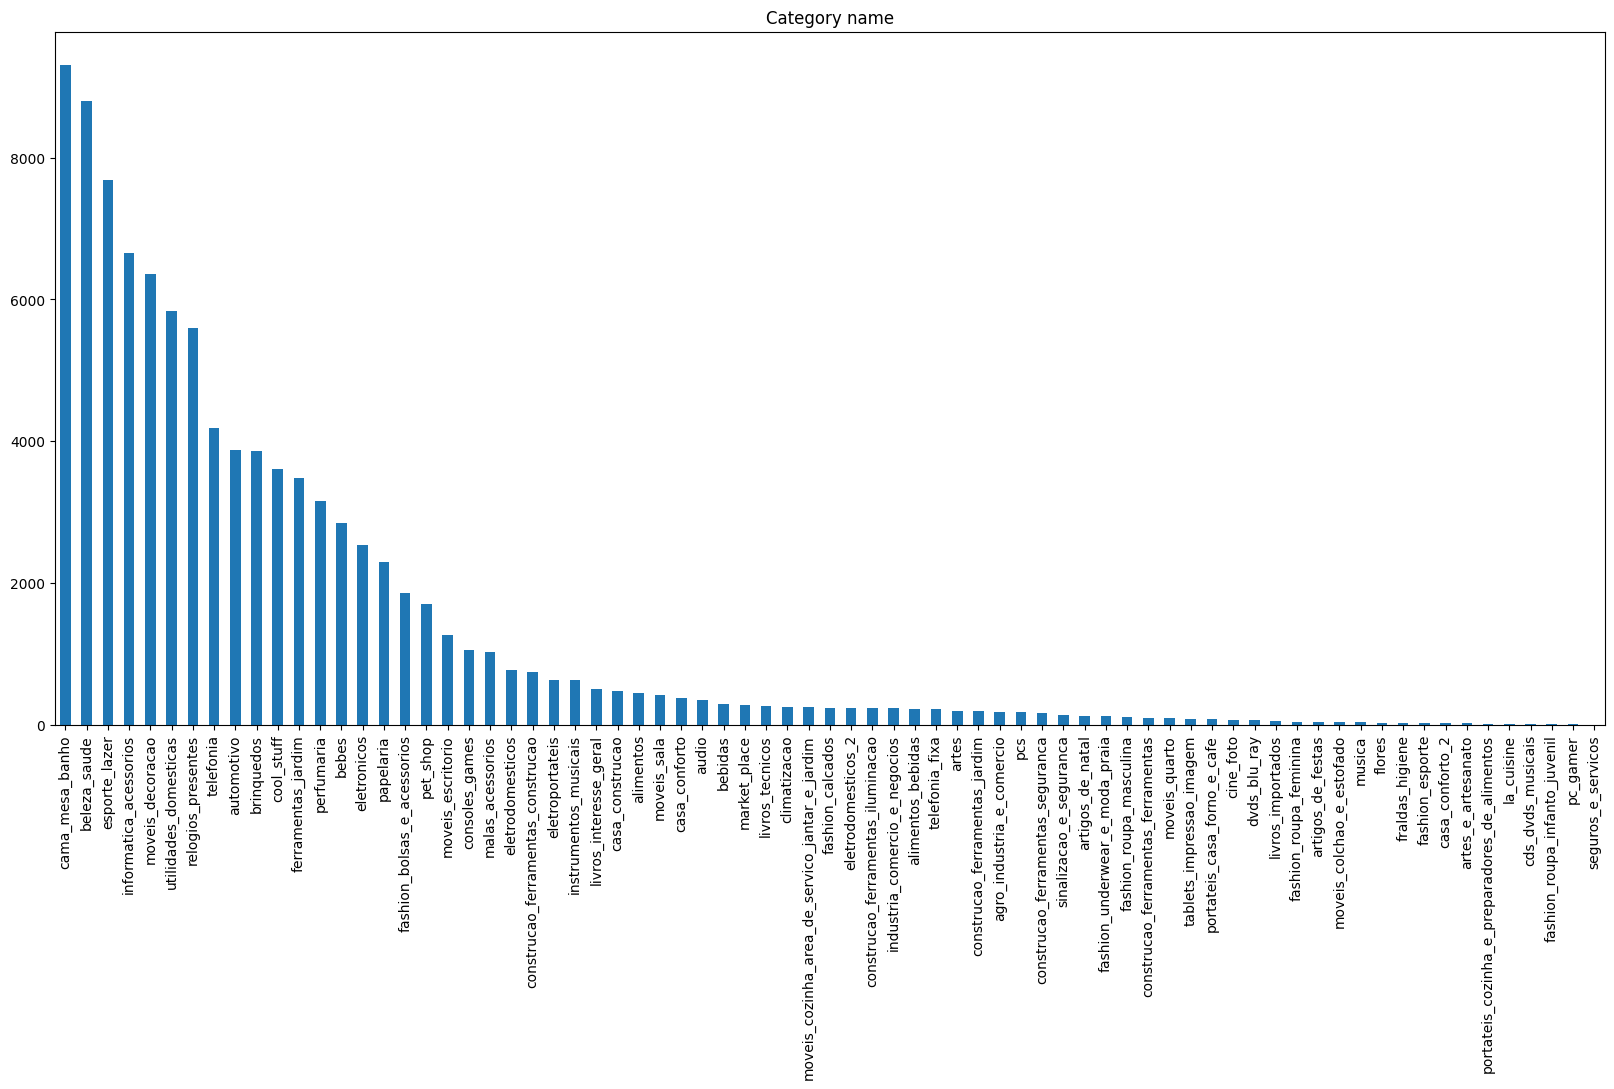

In [ ]:
#Analyse de la distribution des catégories des produits
plt.figure(figsize = (20,9))
plt.title('Category name')
fig = data['product_category_name'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
#Ce que l'ont recherche dans notre problématique, c'est de comprendre les différents types d'utilisateurs et en créer une classification RFM

dataNew = []
dataNew = pd.DataFrame(dataNew)
dataNew['customer_unique_id'] = data['customer_unique_id']
dataNew['customer_id'] = data['customer_id']
dataNew['order_purchase_timestamp'] = data['order_purchase_timestamp']
dataNew['payment_value'] = data['payment_value']
dataNew['review_score'] = data['review_score']

In [ ]:
dataNew.shape

(99441, 5)

In [ ]:
dataNew

,customer_unique_id,customer_id,order_purchase_timestamp,payment_value,review_score
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,146.87,4.0
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,335.48,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,157.73,5.0
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,173.30,5.0
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,252.25,5.0
...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,2018-04-07 15:48:17,88.78,4.0
119139,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,2018-04-04 08:20:22,129.06,5.0
119140,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,2018-04-08 20:11:50,56.04,1.0
119141,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,2017-11-03 21:08:33,711.07,5.0


In [ ]:
dataNew.dtypes

customer_unique_id          object 
customer_id                 object 
order_purchase_timestamp    object 
payment_value               float64
review_score                float64
dtype: object

## 1 - Analyse univariée

A travers cette analyse on observera la répartition des données sur chacune des variable

In [ ]:
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 119142
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        99441 non-null  object 
 1   customer_id               99441 non-null  object 
 2   order_purchase_timestamp  99441 non-null  object 
 3   payment_value             99440 non-null  float64
 4   review_score              98673 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
dataNew.describe()

,payment_value,review_score
count,99440.000000,98673.000000
mean,158.334781,4.086853
std,219.518488,1.347287
min,0.000000,1.000000
25%,60.050000,4.000000
50%,103.350000,5.000000
75%,175.130000,5.000000
max,13664.080000,5.000000


In [ ]:
len(dataNew['payment_value'].unique())

28134

In [ ]:
dataNew['payment_value'].value_counts().sort_values(ascending = False).head(20)

77.57     250
50.00     161
35.00     161
73.34     160
116.94    131
56.78     122
100.00    117
65.00     116
107.78    116
99.90     107
86.15     103
87.64     101
67.50     101
45.00     101
105.28    100
31.75     98 
45.09     96 
37.77     94 
64.10     93 
65.71     92 
Name: payment_value, dtype: int64

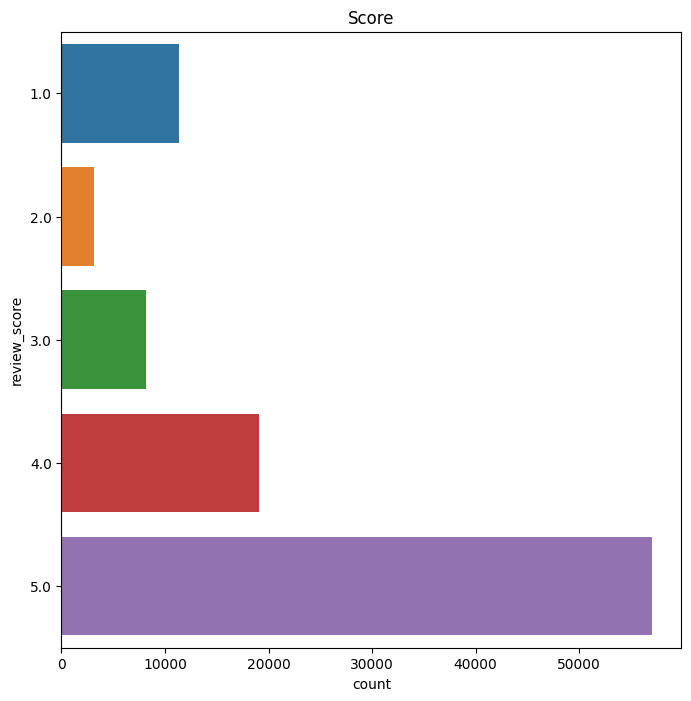

In [ ]:
plt.figure(figsize = (8,8))
plt.title('Score')
fig = sns.countplot(data = dataNew , y = 'review_score')
plt.show()

#Nettoyage

In [ ]:
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 119142
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        99441 non-null  object 
 1   customer_id               99441 non-null  object 
 2   order_purchase_timestamp  99441 non-null  object 
 3   payment_value             99440 non-null  float64
 4   review_score              98673 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
dataNew

,customer_unique_id,customer_id,order_purchase_timestamp,payment_value,review_score
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,146.87,4.0
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,335.48,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,157.73,5.0
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,173.30,5.0
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,252.25,5.0
...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,2018-04-07 15:48:17,88.78,4.0
119139,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,2018-04-04 08:20:22,129.06,5.0
119140,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,2018-04-08 20:11:50,56.04,1.0
119141,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,2017-11-03 21:08:33,711.07,5.0


In [ ]:
dataNew.describe()

,payment_value,review_score
count,99440.000000,98673.000000
mean,158.334781,4.086853
std,219.518488,1.347287
min,0.000000,1.000000
25%,60.050000,4.000000
50%,103.350000,5.000000
75%,175.130000,5.000000
max,13664.080000,5.000000


##Données manquantes

<Axes: >

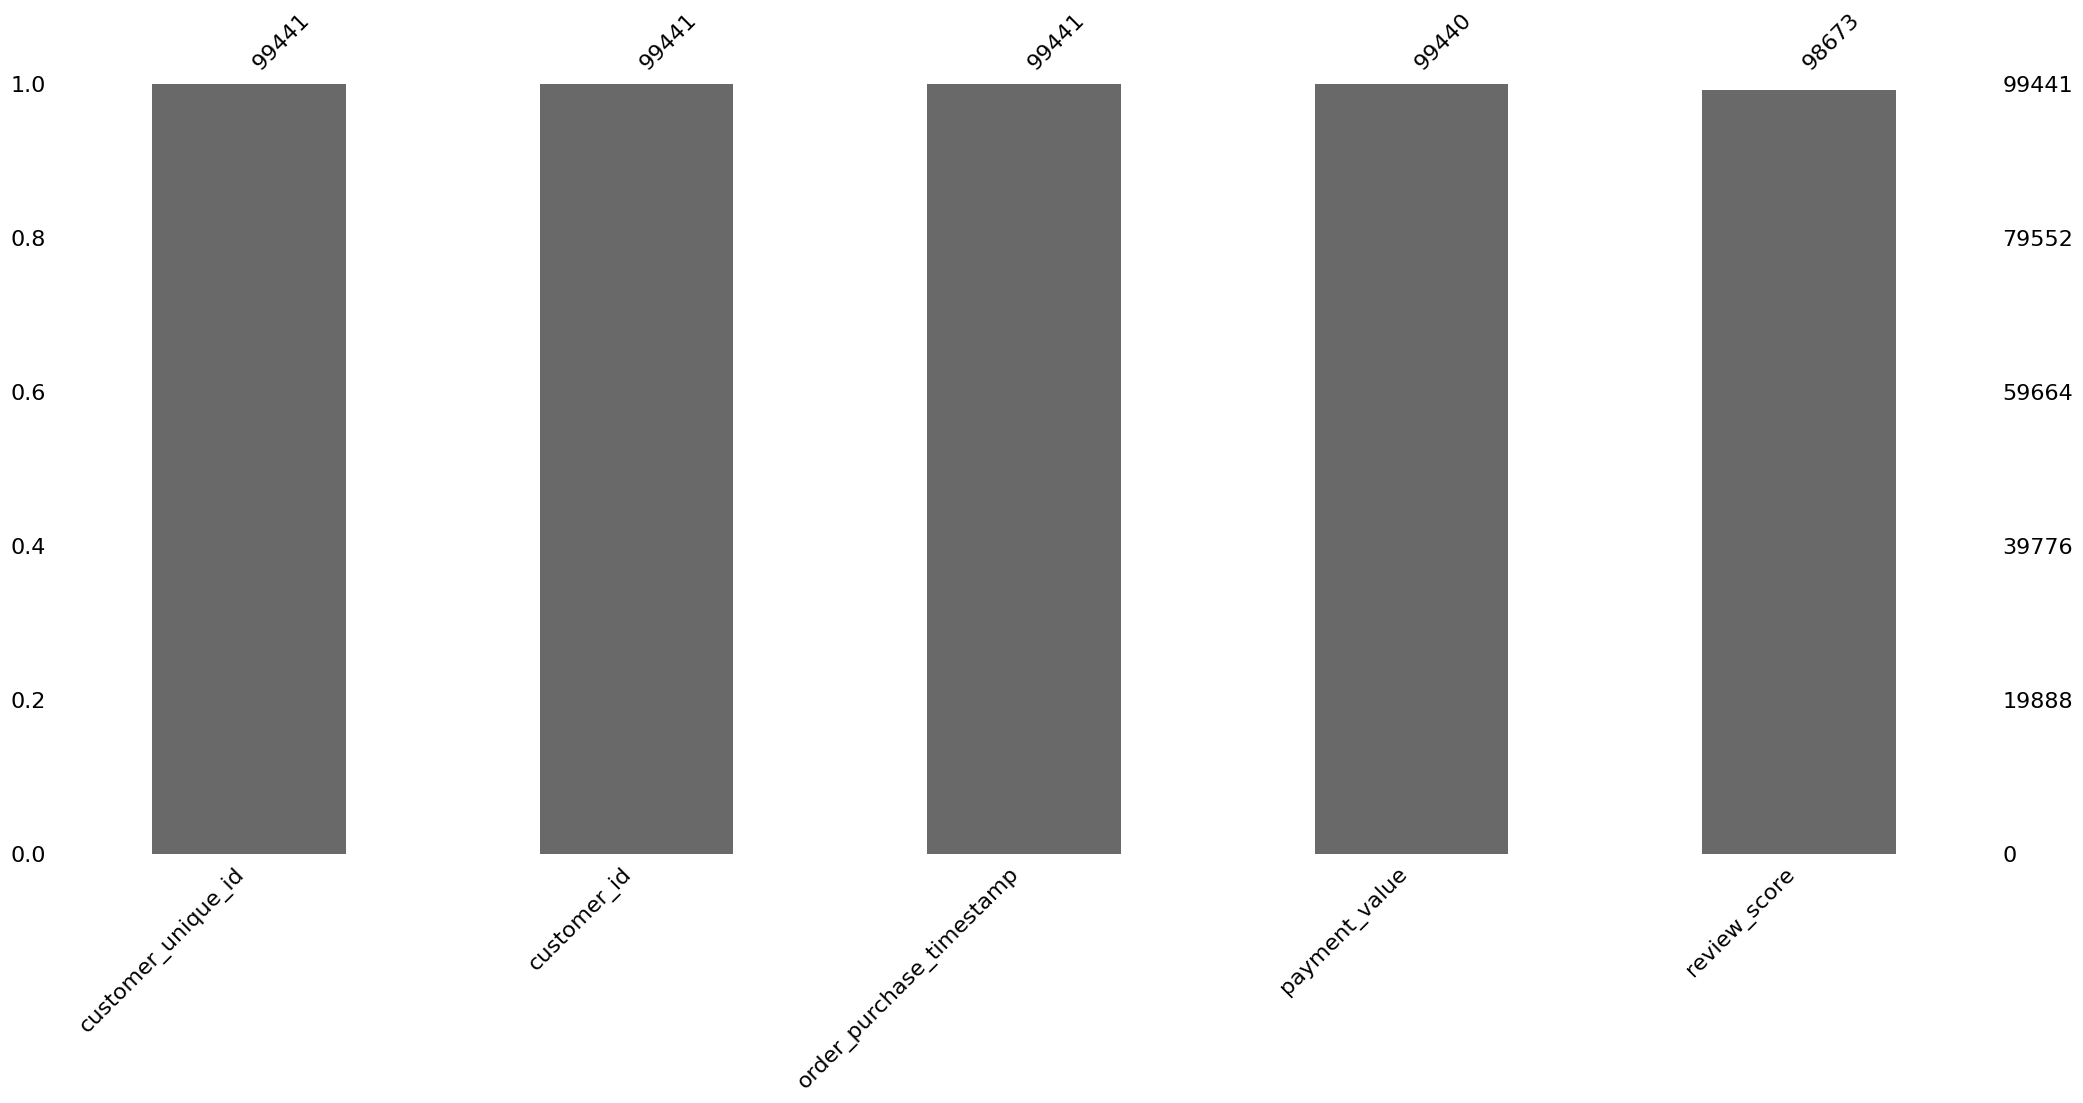

In [ ]:
msno.bar(dataNew)

In [ ]:
dataNew.isna().sum()

customer_unique_id          0  
customer_id                 0  
order_purchase_timestamp    0  
payment_value               1  
review_score                768
dtype: int64

In [ ]:
dataNew['payment_value'] = dataNew['payment_value'].fillna(value = dataNew['payment_value'].mean())

In [ ]:
dataNew['review_score'] = dataNew['review_score'].fillna(0) #0 signifie qu'il n'y a aucune notation

In [ ]:
dataNew.isna().sum()

customer_unique_id          0
customer_id                 0
order_purchase_timestamp    0
payment_value               0
review_score                0
dtype: int64

# Export du nouveau dataset d'étude

In [ ]:
dataNew.to_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet5/dataEcom_Exploration.csv', sep = ',', index = False)